In [113]:
import pickle, os, torch
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score

In [191]:
cols_h=['#scale(0)',
 'desc_scale(1)',
 'num_prog(2)',
 'Mvir((3)',
 'Rvir((4)',
 'rs((5)',
 'vrms((6)',
 'mmp?((7)',
 'scale_of_last_MM((8)',
 'vmax((9)',
 'x((10)',
 'y((11)',
 'z((12)',
 'vx((13)',
 'vy((14)',
 'vz((15)',
 'Jx((16)',
 'Jy((17)',
 'Jz((18)',
 'Tidal_Force((19)',
 'Rs_Klypin(20)',
 'Mvir_all(21)',
 'M200b(22)',
 'M200c(23)',
 'M500c(24)',
 'M2500c(25)',
 'Xoff(26)',
 'Voff(27)',
 'Spin_Bullock(28)',
 'b_to_a(29)',
 'c_to_a(30)',
 'A[x](31)',
 'A[y](32)',
 'A[z](33)',
 'b_to_a(50(34)',
 'c_to_a(50(35)',
 'A[x](50(36)',
 'A[y](50(37)',
 'A[z](50(38)',
 'T/|U|(39)',
 'M_pe_Behroozi(40)',
 'M_pe_Diemer(41)',
 'Halfmass_Radius(42)']

In [192]:
folder = 'results_sweep_redshift_180122'
runs=['Sage_vlarge_all_4t_quantile_raw_final_inqjiq', 'Sage_vlarge_4t_quantile_raw_redshift_99_all_mbntle', 
    'Sage_vlarge_4t_quantile_raw_redshift_95_all_zqkszi', 'Sage_vlarge_4t_quantile_raw_redshift_85_all_vbhipz',
    'Sage_vlarge_4t_quantile_raw_redshift_75_all_mhsefs', 'Sage_vlarge_4t_quantile_raw_redshift_50_all_phepac', 
    'Sage_vlarge_all_4t_z0.0_quantile_raw_znxygp']
ps= [100,99,95,85,75,50,0]

In [136]:
yss=[]
preds=[]
for run in runs:
    pointer=osp.expanduser(f'~/../../scratch/gpfs/cj1223/GraphResults/{folder}/{run}')  
    results=pickle.load(open(osp.join(pointer,'result_dict.pkl'), 'rb'))
    config=pickle.load(open(osp.join(pointer,'construct_dict.pkl'), 'rb'))
    ys, pred, targets = results['low_ys']+9, results['low_pred']+9, config["data_params"]['targets']
    yss.append(ys)
    preds.append(pred)

In [137]:
cols_t=np.array(['M_star', 'v_disk', 'm_cold gas', 'sfr_ave100Myr'])
    
def multi_base(ys, pred, targets):
    n_t = len(targets)
    figs=[]
    for n in range(n_t):
        fig, ax =plt.subplots(1,2, figsize=(12,6))
        ax=ax.flatten()
        ax[0].plot(ys[:,n],pred[:,n], 'ro', alpha=0.3)
        ax[0].plot([min(ys[:,n]),max(ys[:,n])],[min(ys[:,n]),max(ys[:,n])], 'k--', label='Perfect correspondance')
        ax[0].set(xlabel='SAM Truth',ylabel='GNN Prediction', title=cols_t[targets[n]])
        yhat=r'$\hat{y}$'
        ax[0].text(0.6,0.15, f'Bias (mean(y-{yhat})) : {np.mean(ys[:,n]-pred[:,n]):.3f}', transform=ax[0].transAxes)
        ax[0].text(0.6,0.1, r'$\sigma$ :  '+f'{np.std(ys[:,n]-pred[:,n]):.3f}', transform=ax[0].transAxes)
        ax[0].legend()
        vals, x, y, _ =ax[1].hist2d(ys[:,n],pred[:,n],bins=50, norm=mpl.colors.LogNorm(), cmap=mpl.cm.magma)
        X, Y = np.meshgrid((x[1:]+x[:-1])/2, (y[1:]+y[:-1])/2)
        ax[1].contour(X,Y, np.log(vals.T+1), levels=10, colors='black')
        ax[1].plot([min(ys[:,n]),max(ys[:,n])],[min(ys[:,n]),max(ys[:,n])], 'k--', label='Perfect correspondance')
        ax[1].set(xlabel='SAM Truth',ylabel='GNN Prediction', title=cols_t[targets[n]])
        ax[1].legend()
        fig.tight_layout()
        figs.append(fig)
    return figs

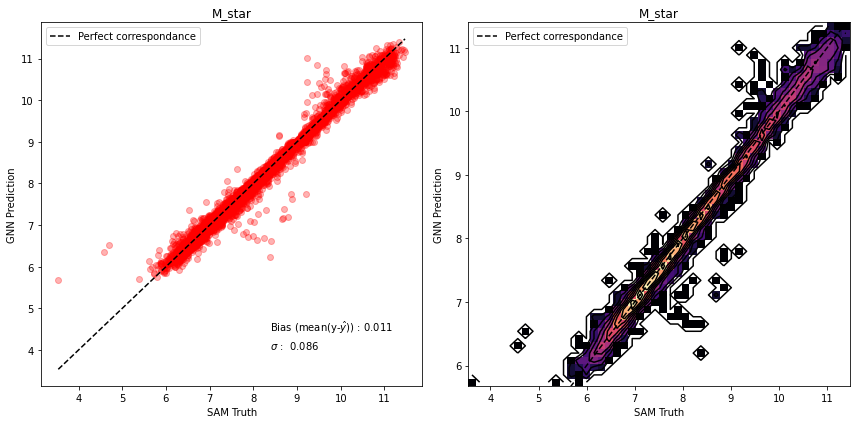

In [138]:
figs=multi_base(ys,pred, targets)

In [139]:
import corner

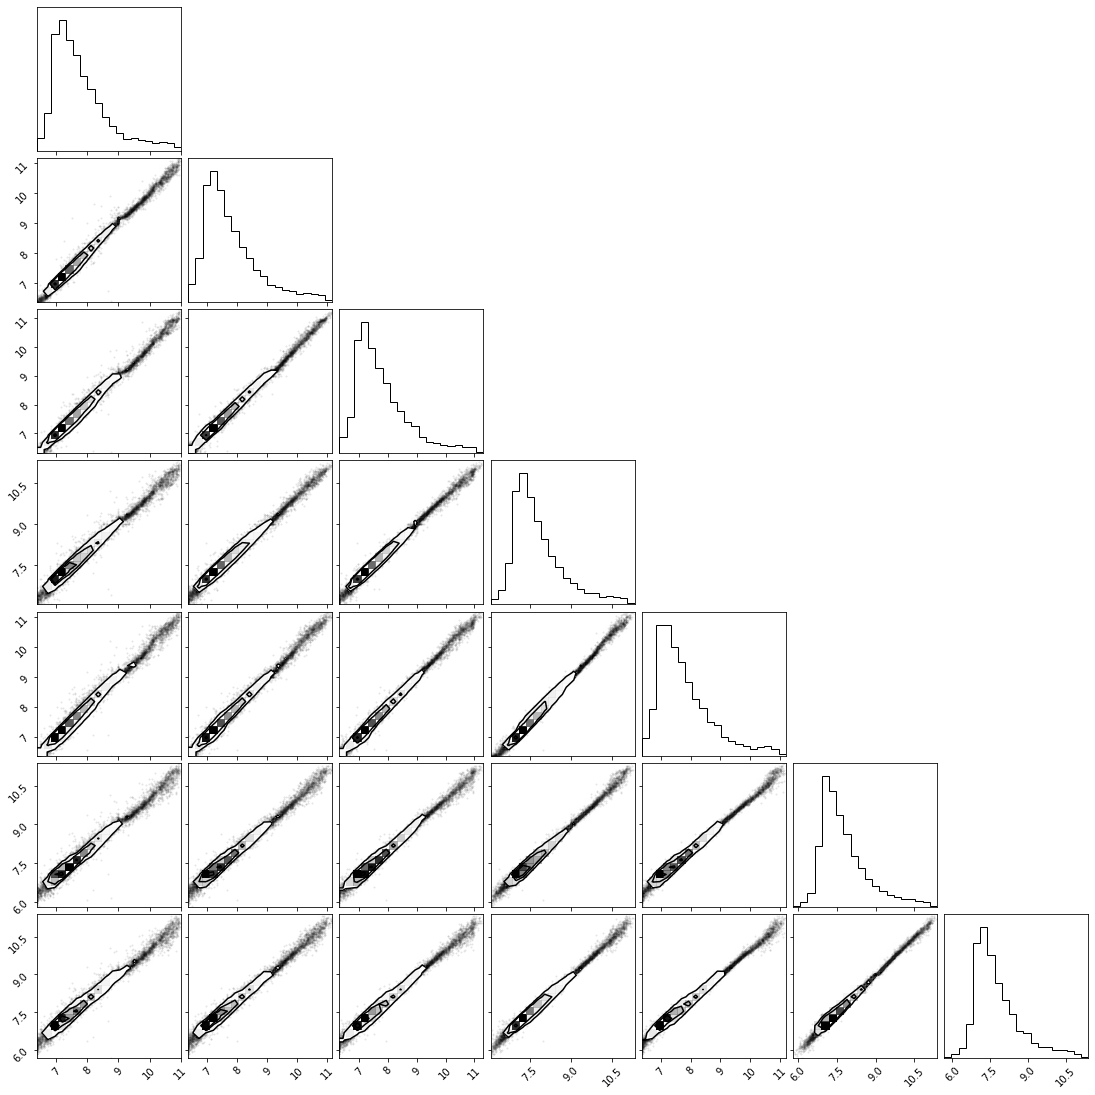

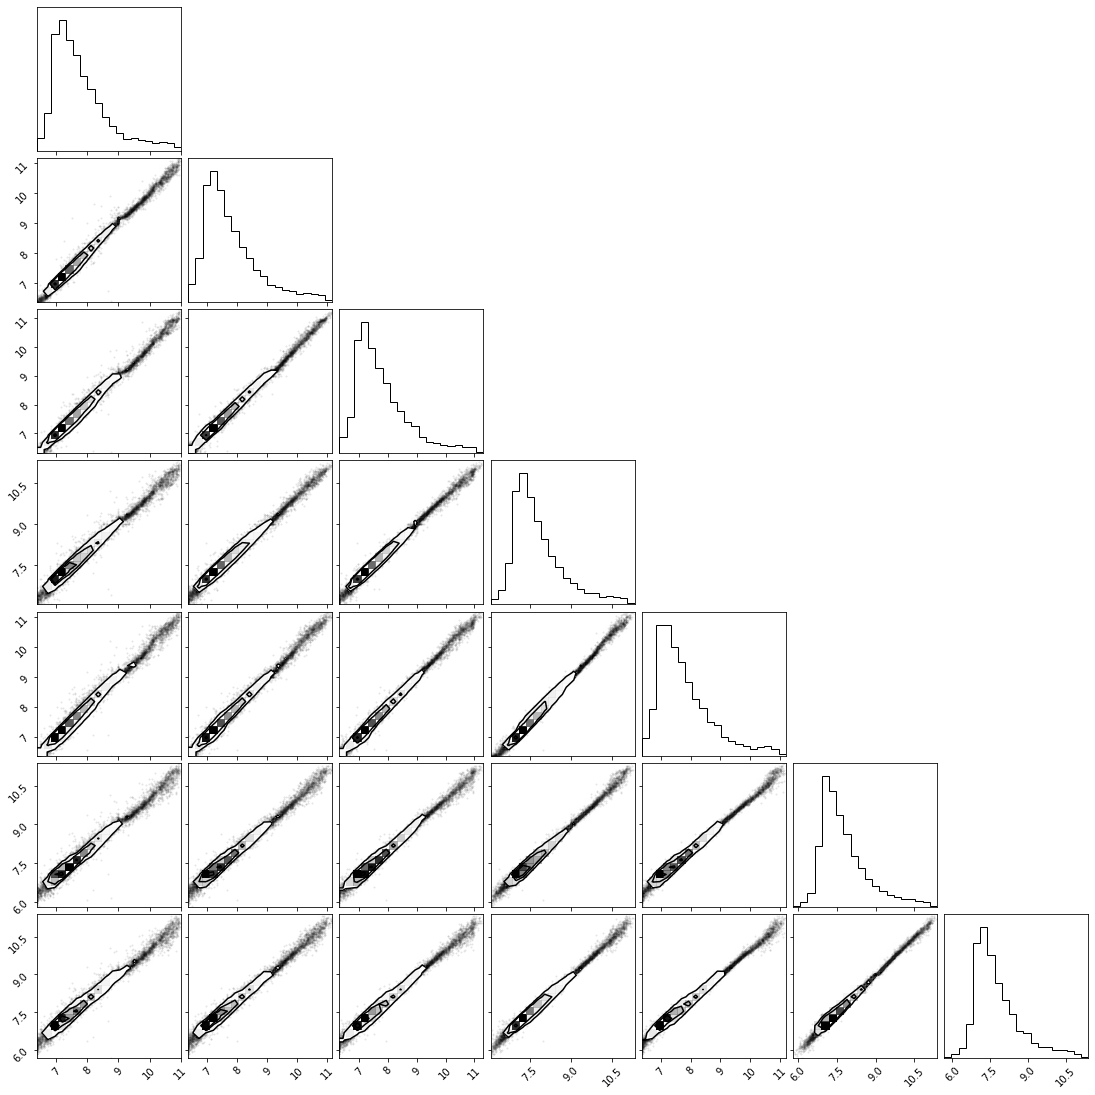

In [142]:
corner.corner(np.hstack(preds))

In [155]:
datat=pickle.load(open(osp.expanduser(f'~/../../../scratch/gpfs/cj1223/GraphStorage/vlarge_all_4t_quantile_raw_final/data.pkl'), 'rb'))
from torch_geometric.data import Data
xs=[]
for d in datat[int(len(datat)*0.8):]:
    xs.append(d.x.numpy())

In [156]:
xs=np.vstack(xs)

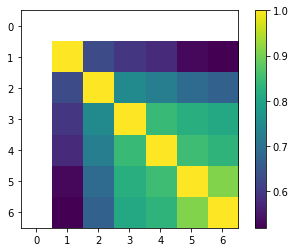

In [209]:
k=0
plt.imshow(np.corrcoef(np.hstack(preds-preds[k]).T))
plt.colorbar()

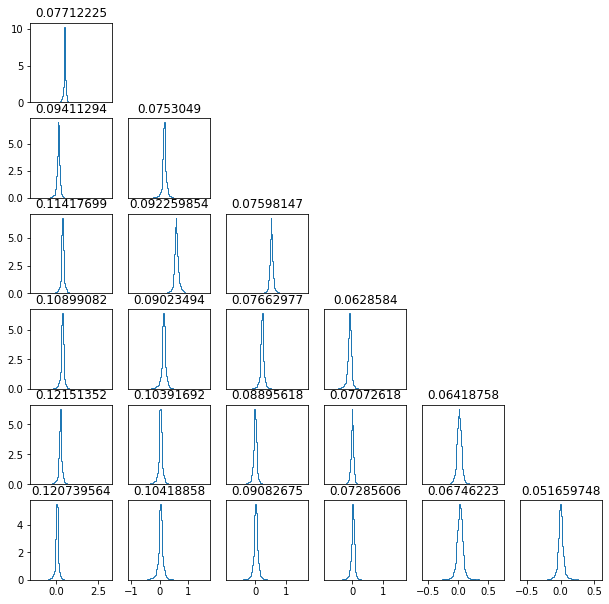

In [262]:
corrs=np.zeros((7,7))
fig, ax = plt.subplots(len(preds), len(preds), figsize=(12,12))
for i in range(len(preds)):
    for j in range(i, len(preds)):
        ax[j][i].hist(preds[i]-preds[j], bins=100, histtype='step', density=1);
        fig.delaxes(ax[i][j])
        if i!=0:
            ax[j][i].set(yticks=[])
        if j!=6:
            ax[j][i].set(xticks=[])
        ax[j][i].set(title=np.std(preds[i]-preds[j]))
        corrs[j,i]=np.std(preds[i]-preds[j])
# print(np.std(preds[k]-preds[k+1]))

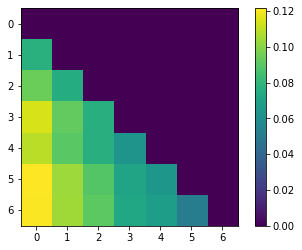

In [264]:
plt.imshow(corrs)
plt.colorbar()

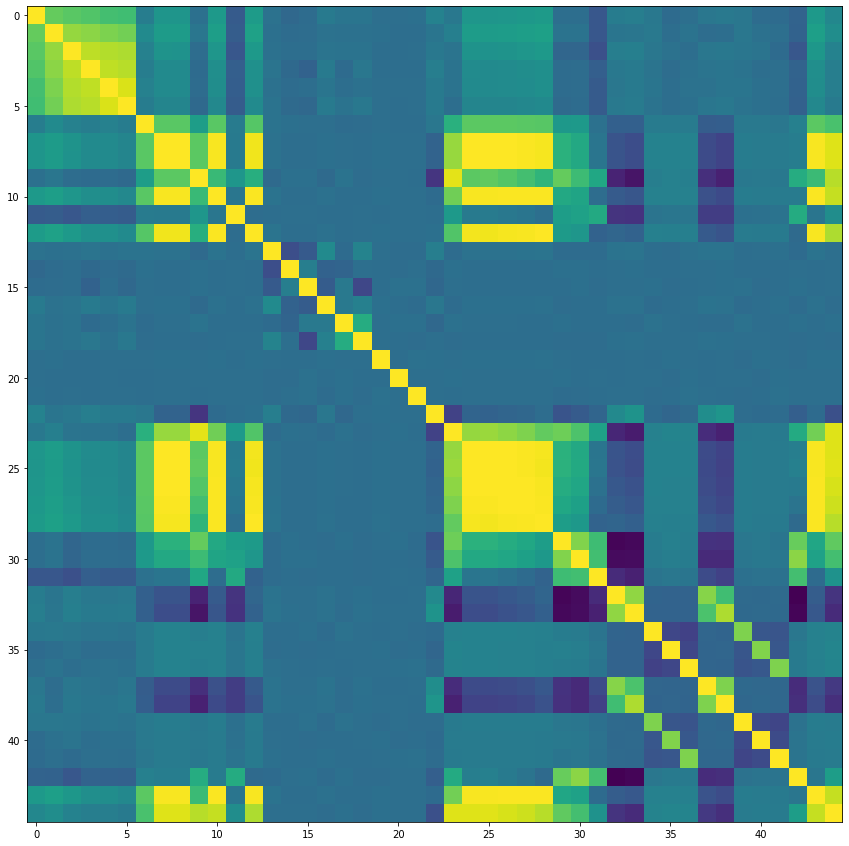

In [220]:
a=np.hstack([np.hstack(preds-preds[k]),xs])
h=np.corrcoef(a.T)
fig, ax = plt.subplots(figsize=(15,15))
show=ax.imshow(np.corrcoef(a.T[~np.isnan(h)[k+1]]))
# plt.colorbar(show)

/tmp/ipykernel_11970/1275687.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cols=cols[[~np.isnan(h)[0]]]


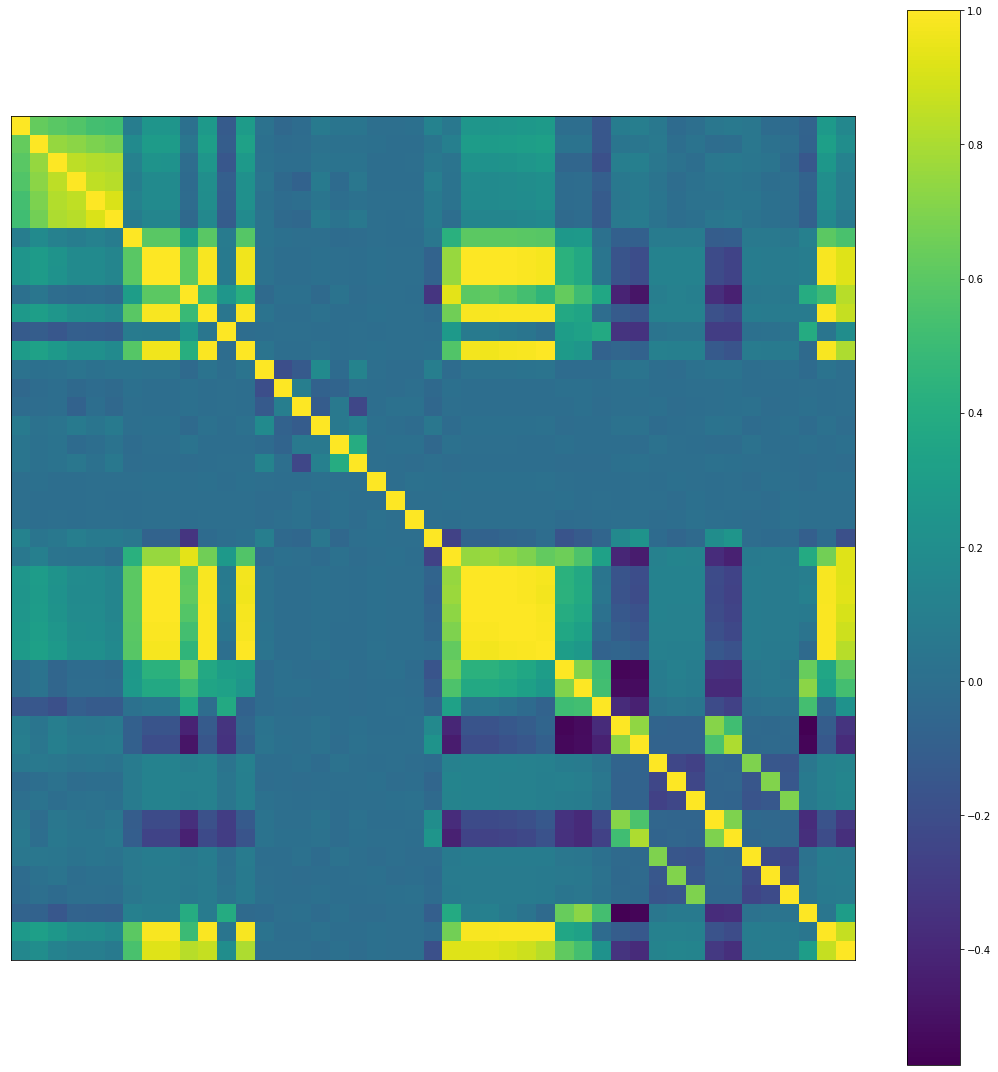

In [221]:
cols = np.hstack([ps, cols_h])
cols=cols[[~np.isnan(h)[0]]]
ax.set_xticks(np.arange(len(cols)))
ax.set_xticklabels(cols, rotation = 90)
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols)
ax.tick_params(axis = 'x', bottom = False, top = True, labelbottom = False, labeltop = True)
# ax.xticks(rotation = 90)

fig.colorbar(show)

fig.tight_layout()
fig